### 1. 토픽 모델링을 위한 라이브러리 불러오기

In [1]:
from tqdm import tqdm # progress bar
import pandas as pd
import numpy as np
import re
import warnings # 경고 알림 제거
import pickle
# from pprint import pprint

from gensim import corpora #gensim에서 사용하는 vectorizer 모듈과, 
from gensim import models #gensim에서 사용하는 LDA model을 불러온다 
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib inline

import time

import warnings # 경고 알림 제거
warnings.filterwarnings("ignore", category=Warning) # 경고 알림이 뜨면 모두 무시합니다.

In [2]:
input_file_name = "data/BVL_v2.pk"
with open(input_file_name, 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df = pickle.load(f)
    df = df[df['year']!=2019] #불가리만 DTM때문에 2019년 추출해서 2019년 제외한 df으로 수정

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3354 entries, 0 to 3353
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      3354 non-null   object        
 1   article_type     3354 non-null   object        
 2   article_titles   3354 non-null   object        
 3   nick_names       3354 non-null   object        
 4   dates            3354 non-null   object        
 5   num_views        3354 non-null   int32         
 6   article_content  3354 non-null   object        
 7   num_comment      3354 non-null   int64         
 8   comment_list     3354 non-null   object        
 9   new_dates        3354 non-null   datetime64[ns]
 10  year             3354 non-null   int64         
 11  month            3354 non-null   int64         
 12  day              3354 non-null   int64         
 13  weekday          3354 non-null   int64         
 14  nouns_title      3354 non-null   object 

In [4]:
tokenized_text = [d for d in df['nouns_document']] #df['nouns_document'].to_list()가능

In [5]:
print(tokenized_text[:3])

[['드디어', '언박싱', '불가리', '비제로원', '팔찌', '유색', '보석', '백화점', '조명', '때문', '반짝임', '니지', '소형차', '손목', '담력', '저절로', '생기', '명품', '주얼리', '데일리', '다이아', '뱅글', '어머님', '처음', '자리', '주신', '목걸이', '꽃다발', '편지', '며느리', '유색', '보석', '요즘', '불가리', '보석', '어보', '다양', '유색', '보석', '착용', '한적', '그림', '색감', '나이', '드니', '유색', '매력', '리셋', '불가리', '뱅글', '다이아', '데일리', '최고', '착용', '이일수', '자주', '최고', '나이', '평소', '아무', '안해', '평소', '에티튜드', '불가리', '뱅글', '영롱', '영롱', '자체', '영롱'], ['까르띠에', '반지', '일명', '노스', '반지', '러브', '링', '보석', '빨강', '파랑', '노랑', '초록', '깔깔', '혼하', '웨딩링', '남친', '여주면', '도망', '불가리', '가격', '이또', '어벤져스', '마블', '하빈'], ['불가리', '비제로원', '미니', '실물', '어림', '완불', '계약금', '메달', '가로세로', '미리', '전국', '품절', '실물', '판교', '품절', '내년', '인상', '출시', '예정', '군영', '메달', '쪼만', '사이즈', '사이즈', '가로세로', '길이', '안잭', '고이', '전국', '품절', '완불', '웨이', '동생', '고하', '부러', '메달', '사이즈', '대강', '어림', '보기']]


### 2. 토픽 모델링 코드

In [6]:
%%time
# 토픽 개수, 키워드 개수를 정해주는 변수를 추가.
NUM_TOPICS = 3

NUM_TOPIC_WORDS = 30


def build_doc_term_mat(documents):
    # 문서-단어 행렬 만들어주는 함수.
    print("Building document-term matrix.")
    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(document) for document in documents]
        
    return corpus, dictionary


def print_topic_words(model):

    # 토픽 모델링 결과를 출력해 주는 함수.
    print("\nPrinting topic words.\n")
    
    for topic_id in range(model.num_topics): #model: lda된 모델
        topic_word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS) #show_topic(topic_no, num_word) 몇번째 토픽의 확률높은 순서대로 몇개 >> 모델링이 잘 되었을수록 한 주제 안에는 의미론적으로 유사한 단어가 많이 모여있음
        print("Topic ID: {}".format(topic_id))
        
        for topic_word, prob in topic_word_probs:
            print("\t{}\t{}".format(topic_word, prob))
            
        print("\n")

# document-term matrix를 만들고,
corpus, dictionary = build_doc_term_mat(tokenized_text)
# LDA를 실행.
model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, alpha="auto", eta="auto", passes=100) #id2word에 dictionary넣어줌
# 결과를 출력.
print_topic_words(model)

Building document-term matrix.

Printing topic words.

Topic ID: 0
	불가리	0.04070871323347092
	목걸이	0.034458037465810776
	반클리프	0.02159002795815468
	다이아	0.02008112333714962
	디바스드림	0.01874997466802597
	팔찌	0.016644848510622978
	비제로원	0.014536743983626366
	데일리	0.013508100062608719
	추천	0.012622668407857418
	미니	0.011021857149899006
	자개	0.010797468945384026
	착용	0.010381080210208893
	시계	0.00996850524097681
	까르띠에	0.009207168594002724
	귀걸이	0.009103202261030674
	주얼리	0.007943728938698769
	가격	0.007919618859887123
	티파니	0.007777437102049589
	파베	0.00730450265109539
	느낌	0.007197032682597637
	로즈골드	0.006401999853551388
	사이즈	0.006132971029728651
	반지	0.005710890516638756
	빈티지	0.005385984666645527
	매장	0.005084183998405933
	러브	0.0046254596672952175
	구매	0.004597244784235954
	존재	0.004191979765892029
	스윗	0.004180459305644035
	쎄뻥	0.004039919003844261


Topic ID: 1
	샤넬	0.015513894148170948
	불가리	0.01542110275477171
	가방	0.014018216170370579
	매장	0.010008041746914387
	상품권	0.008247483521699905
	행사	0.00677013024687767
	디올	

### 3. LDA 해석
- 다양한 토픽 개수로 실험해보고, 토픽당 출력단어들도 늘리면서 해석해볼것
- 각 문서별 할당되는 토픽들을 살펴보면서 토픽에 대한 해석할것(# df.loc[0]: 첫번쨰 토픽 내용 실제로 읽어볼것)

In [7]:
model.get_document_topics(corpus)[7] #0번째 문서의 토픽 1~3 분포(모든 토픽의 분포 확률의 합은 1)

[(0, 0.99749935)]

In [8]:
def make_topictable_per_doc(model, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(model[corpus]):
        doc = topic_list[0] if model.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [9]:
topictable = make_topictable_per_doc(model, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.8251,"[(0, 0.82510465), (1, 0.17349109)]"
1,1,2.0,0.6410,"[(1, 0.35154903), (2, 0.64099777)]"
2,2,2.0,0.9942,"[(2, 0.9941537)]"
3,3,1.0,0.6605,"[(0, 0.33569655), (1, 0.66046566)]"
4,4,0.0,0.9898,"[(0, 0.98983735)]"
5,5,0.0,0.9915,"[(0, 0.991496)]"
6,6,0.0,0.7850,"[(0, 0.7849988), (2, 0.21361624)]"
7,7,0.0,0.9975,"[(0, 0.99749935)]"
8,8,2.0,0.8876,"[(0, 0.11176995), (2, 0.88763905)]"
9,9,0.0,0.8967,"[(0, 0.8967224), (2, 0.102509)]"


In [10]:
topictable.groupby('가장 비중이 높은 토픽')['가장 높은 토픽의 비중'].count()

가장 비중이 높은 토픽
0.0    1771
1.0     597
2.0     986
Name: 가장 높은 토픽의 비중, dtype: int64

In [11]:
df_lda = pd.concat([df, topictable], axis=1)
df_lda.to_excel('df_lda.xlsx', index=False)

In [17]:
#pickle: 저장된 list그자체로 저장해서 list를 그 자체로 가져오기위하여
save_file_name = "df_lda.pk"
with open(save_file_name, "wb") as f: #wb: write binary
    pickle.dump(df_lda, f)

C:\Users\ohyeb\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df_lda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3354 entries, 0 to 3353
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      3354 non-null   object        
 1   article_type     3354 non-null   object        
 2   article_titles   3354 non-null   object        
 3   nick_names       3354 non-null   object        
 4   dates            3354 non-null   object        
 5   num_views        3354 non-null   int32         
 6   article_content  3354 non-null   object        
 7   num_comment      3354 non-null   int64         
 8   comment_list     3354 non-null   object        
 9   new_dates        3354 non-null   datetime64[ns]
 10  year             3354 non-null   int64         
 11  month            3354 non-null   int64         
 12  day              3354 non-null   int64         
 13  weekday          3354 non-null   int64         
 14  nouns_title      3354 non-null   object 

C:\Users\ohyeb\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4. pyLDAvis를 통한 토픽 모델링 결과 시각화

In [13]:
# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim_models

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()

# pyLDAvis 실행.
data = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
data #print하면안됨
# 원: 각 토픽의 크기(단어개수), 한 축에 같이 있으면 겹치는게 있다는소리

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.117755  0.077745       1        1  48.215299
2     -0.060608 -0.096336       2        1  27.195290
1      0.178363  0.018592       3        1  24.589411, topic_info=      Term         Freq        Total Category  logprob  loglift
60      반지  2559.000000  2559.000000  Default  30.0000  30.0000
114  디바스드림  2218.000000  2218.000000  Default  29.0000  29.0000
102   반클리프  2602.000000  2602.000000  Default  28.0000  28.0000
15     목걸이  4716.000000  4716.000000  Default  27.0000  27.0000
21    비제로원  3048.000000  3048.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
104    브랜드   220.187238   859.440124   Topic3  -5.6122   0.0411
42     주얼리   236.931891  1319.901560   Topic3  -5.5389  -0.3147
51    까르띠에   197.440085  1811.411915   Topic3  -5.7212  -0.8136
861     블랙   163.876091   338.592102   Topic3  -5.9075   0.6772
33      요즘   167.784336   771.486893   Topic3  -5.8840  -0.1228

[243 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
50        1  0.609096     가격
50        2  0.327324     가격
50        3  0.063773     가격
2580      2  0.986034     가드
2580      3  0.013600     가드
...     ...       ...    ...
128       1  0.897862     화려
128       2  0.097662     화려
128       3  0.006301     화려
369       1  0.747017  화이트골드
369       2  0.252812  화이트골드

[360 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

### 5. 토픽 개수 달리하면서 지표(perplexity/coherence score)계산
- 불가리 문서: 3개가 가장 적절해보임
- coherence score가 높다(lda,dtm모델이 데이터들의 확률값에 얼마나 수렴이 잘 되었느냐)고 해서 토픽모델링이 잘되었느냐(사람이봤을때: 예: domain knowledge 고려하여)는 아님
- 구어체 dataset보다는, official(논문, 기사 등) 데이터 쓰면 조금더 결과가 뚜렷할것임

C:\Users\ohyeb\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:46<00:00,  5.84s/it]


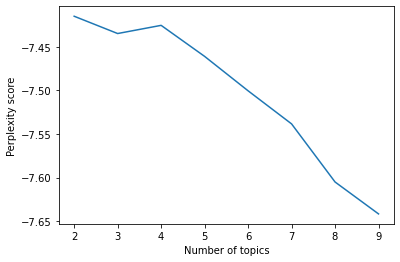

In [14]:
# 토픽개수를 늘릴수록 perplexity는 감소하는 경향을 보이다가, 특정 토픽 개수 지점을 지나면 더이상 perplexity는 감소하지 않고 수렴하는 지점 등장
# perplexity(혼란도: 특정 확률모델이 실체로 관측되는 값을 얼마나 잘 예측하는지) 낮을 수록 실제 문헌 결과를 잘 반영, 학습이 잘 된 모델임

perplexity_values = []
for i in tqdm(range(2,10)):
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))


x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

C:\Users\ohyeb\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:42<00:00, 12.76s/it]


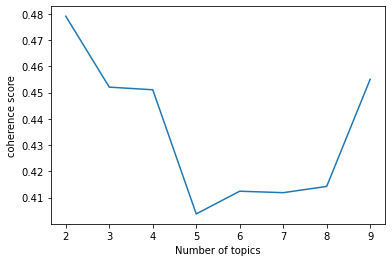

In [15]:
# 모델링이 잘 되었을수록 한 주제 안에 의미론적으로 유사한 단어가 많이 모여있음 
# >> 상위 단어간의 유사도를 계산하여 평균을 구하면 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는지 알 수 있음
# coherence score 높을수록 모델링 잘되었음

coherence_values = []
for i in tqdm(range(2,10)):
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_lda = CoherenceModel(model=ldamodel, texts=tokenized_text, dictionary=dictionary, corpus=corpus, topn=30,  coherence='c_v').get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show() 
# 3~9 사이에서 지표들이 위아래로 요동침
#perplexity/coherence 두개 종합하였을때 지표가 수렴하는 토픽인 3개가 적절